In [2]:
using Eirene
using DelimitedFiles
using PlotlyJS

In [138]:
# filepath = "/PHAML/data/data.csv"
folder_path = "C:/Users/jevin/Documents/Documents/Education/Self-Learning/Persistant Homology/PHAML"
filepath = folder_path * "/data/data.csv" # * is used for string concatenation julia
POINTCLOUD = readdlm(filepath, ',')

2×6 Matrix{Float64}:
 0.0  0.0  1.0  1.0  2.0  4.0
 0.0  1.0  0.0  1.0  1.0  1.0

In [123]:
n = size(POINTCLOUD,2)

6

In [295]:
PH = eirene(POINTCLOUD, maxdim=2, model="pc") # computes the PH of POINTCLOUD. 
# Eirene generally uses Vietoris–Rips filtration
# maxdim - we don't compute higher dimensions

Dict{String, Any} with 12 entries:
  "symmat"   => [5 4 … 4 0; 4 5 … 3 0; … ; 4 3 … 5 2; 0 0 … 2 5]
  "maxnz"    => [0, 15, 9, 5, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7], [1, 5, 8, 10, 11, 12, 12], [1, 7, 10, 1…
  "cyclerep" => [Vector{Int64}[], [[1, 5], [1, 3], [1, 2], [1, 6], [4, 1], [4]]…
  "phi"      => [Int64[], [4, 2, 1, 11, 6], [1, 3, 5, 6, 2, 4], [1, 2, 3, 4], I…
  "plo"      => [Int64[], [5, 3, 2, 6, 1], [5, 7, 9, 10, 3, 8], [8, 9, 7, 10], …
  "ocg2rad"  => [2.23607, 2.0, 1.41421, 1.0, 0.0]
  "farfaces" => [[1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 3, 4, 5, 4, 5, 5, 6], [5, 6, …
  "nvl2ovl"  => [4, 3, 2, 1, 5, 6]
  "input"    => Dict{String, Any}("genera"=>[0.0 0.0 … 2.0 4.0; 0.0 1.0 … 1.0 1…
  "tid"      => [Int64[], [5, 3, 2, 6, 1, 4], [5, 7, 9, 10, 3, 8], [8, 9, 7, 10…
  "grain"    => [[5, 5, 5, 5, 5, 5], [4, 4, 3, 4, 3, 4, 3, 4, 2, 1, 2], [3, 3, …

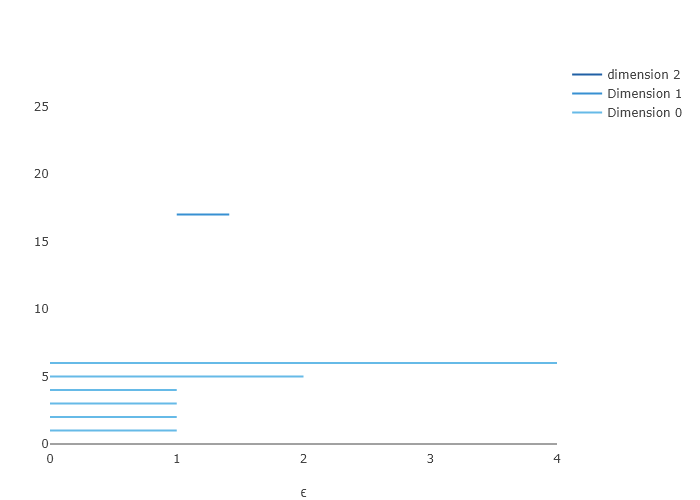

In [130]:
# Plot diagram up to voids
plotbarcode_pjs(PH,dim=0:2)

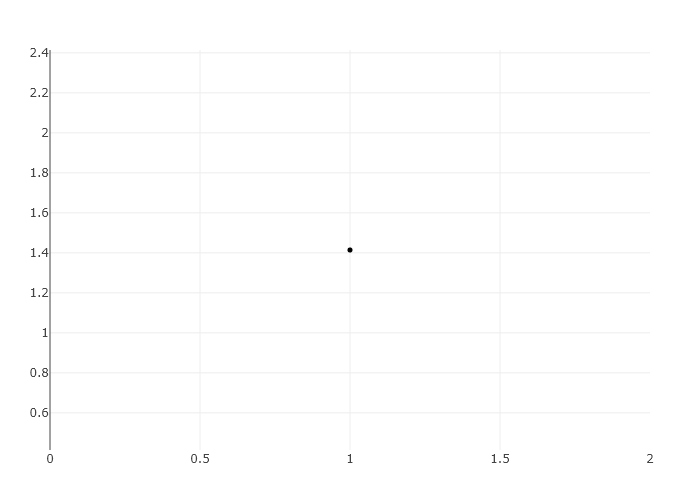

In [131]:
plotpersistencediagram_pjs(PH,dim=1)
# x -> birth time
# y -> death time
# ezplot_pjs(POINTCLOUD)

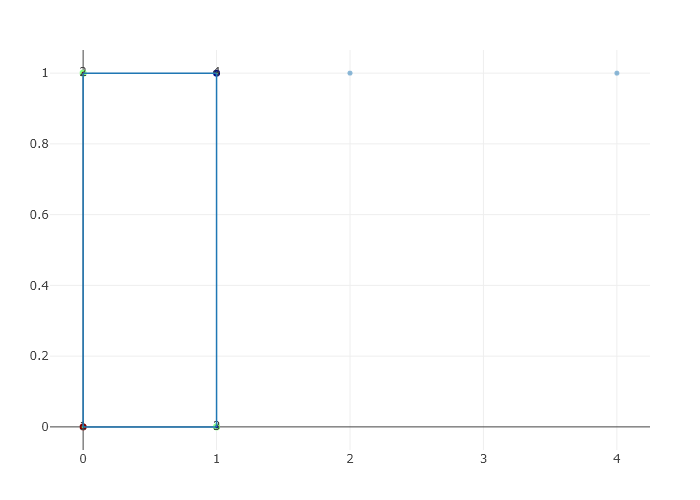

In [296]:
plotclassrep_pjs(PH,dim=1,class=1)
#  class is just the most persistent feature thats lasts the longest
# basiclaly the index of the position of the homology class in the barcode
# A Cycle should be drawn

In [301]:
b = barcode(PH, dim=0)
# when y = inf, that data point never dies
# birth and death for the results

6×2 Matrix{Float64}:
 0.0   1.0
 0.0   1.0
 0.0   1.0
 0.0   2.0
 0.0   1.0
 0.0  Inf

In [ ]:
# Output barcode data
writedlm("barcode", b)

In [228]:
# outputs cycle representing homological features
rep = classrep(PH, dim=1, class=1)
# m x n array
# n -> number of simplices in cycle

2×4 Matrix{Int64}:
 2  3  1  1
 4  4  3  2

Complex Data Points

In [340]:
pc = rand(3,100)

3×100 Matrix{Float64}:
 0.544139   0.493565  0.14761   0.584946  …  0.824197  0.28063   0.461499
 0.251951   0.593007  0.790797  0.966631     0.804925  0.371063  0.905556
 0.0392008  0.189361  0.158249  0.919064     0.775306  0.288313  0.160508

In [ ]:

ezplot_pjs(pc)

In [341]:
PH = eirene(pc, maxdim=2, model="pc")

Dict{String, Any} with 12 entries:
  "symmat"   => [3266 3205 … 1 109; 3205 3266 … 312 0; … ; 1 312 … 3266 0; 109 …
  "maxnz"    => [0, 1195, 19434, 203610, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  92, 93, 94, 95, 96, 97, 98,…
  "cyclerep" => [Vector{Int64}[], [[2, 3], [2, 7], [6, 8], [9, 15], [4, 16], [4…
  "phi"      => [Int64[], [100, 196, 462, 701, 296, 293, 1657, 626, 2746, 2604 …
  "plo"      => [Int64[], [3, 7, 8, 15, 16, 13, 23, 14, 92, 46  …  1, 6, 9, 78,…
  "ocg2rad"  => [0.75705, 0.75685, 0.756638, 0.75638, 0.75634, 0.756022, 0.7560…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96, 97,…
  "nvl2ovl"  => [6, 71, 27, 83, 80, 28, 43, 29, 69, 25  …  60, 47, 97, 4, 67, 3…
  "input"    => Dict{String, Any}("genera"=>[0.544139 0.493565 … 0.28063 0.4614…
  "tid"      => [Int64[], [3, 7, 8, 15, 16, 13, 23, 14, 92, 46  …  6, 9, 78, 80…
  "grain"    => [[3266, 3266, 3266, 3266, 3266, 3266, 3266, 3266, 3266, 3266  ……

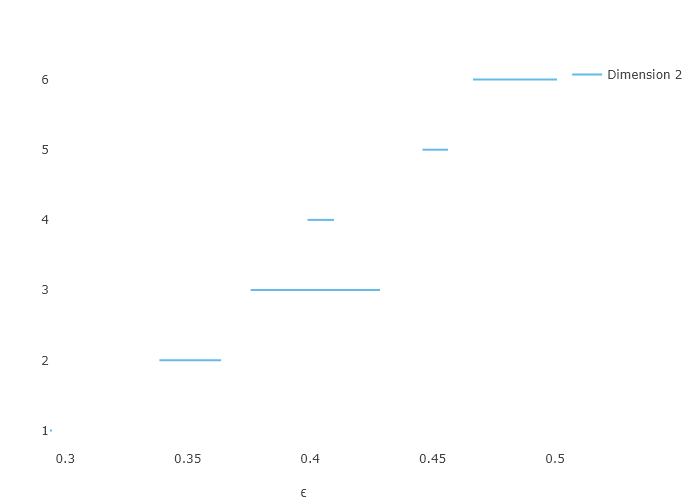

In [360]:
plotbarcode_pjs(PH, dim=2)

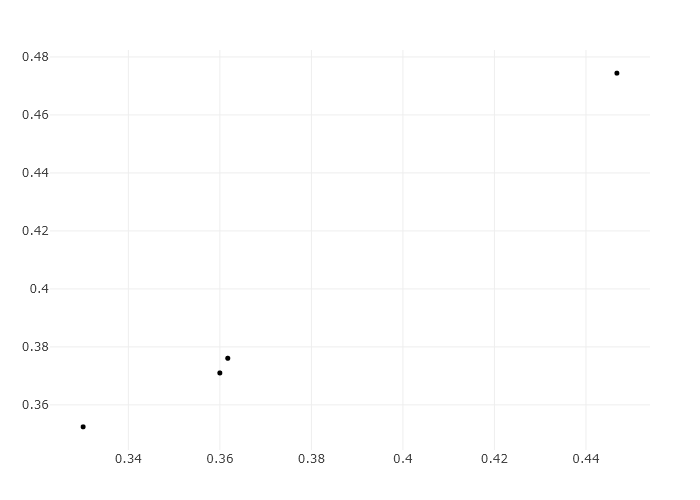

In [338]:
plotpersistencediagram_pjs(PH,dim=2)

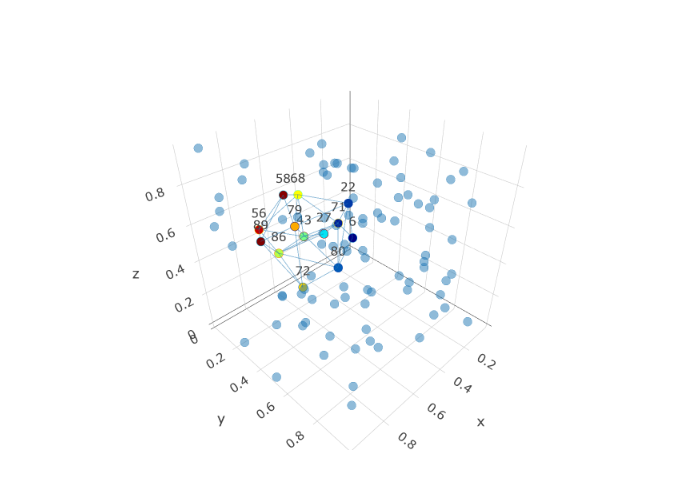

In [378]:
plotclassrep_pjs(PH,dim=2, class=2)

In [ ]:
b = barcode(PH, dim=2)
# persistent features within that dimension when they get born and die

6×2 Matrix{Float64}:
 0.293785  0.294603
 0.338463  0.36366
 0.375744  0.428556
 0.398975  0.409801
 0.445898  0.456338
 0.466554  0.500839

In [ ]:
N = size(b,1)
# how many classes

6

In [385]:
for i in 1:N
    println(classrep(PH, dim=2, class=i))
end


[66 1 66 20 57 20 20 20; 32 57 1 66 32 57 1 66; 85 85 85 1 85 32 57 32]
[80 22 22 86 68 72 89 43 86 56 56 79 79 89 79 86 79 79 68 56 79 89; 71 71 80 80 43 86 56 27 43 86 58 89 89 56 58 27 68 22 22 68 72 72; 6 6 6 71 71 80 58 71 27 43 68 72 58 86 68 71 22 80 71 43 80 86]
[28 22 22 77 8 73 8 5 16 31 31 23 17 54 54 23 54 77 29 23 31 16 23 34 34 34 16 23 34 16; 71 71 28 29 29 17 77 77 5 73 54 16 8 17 73 34 73 22 28 31 73 17 54 31 5 22 8 16 17 34; 6 6 6 71 28 28 29 22 77 7 7 34 28 28 7 31 28 71 71 54 17 8 17 17 22 28 77 17 28 5]
[22 33 73 31 34 73 31 34 31 34 7 34 33 34; 28 22 17 73 31 7 73 31 33 22 28 17 7 33; 6 6 28 7 33 28 17 17 7 28 6 28 6 22]
[5 22 98 98 73 31 4 34 73 31 34 31 5 34 34 7 33 4 34 33 4 4; 80 28 5 33 17 73 34 31 7 73 31 33 22 5 22 28 80 34 17 7 98 98; 6 6 80 80 28 7 33 33 28 17 17 7 6 22 28 6 6 5 28 6 33 5]
[28 7 45 62 92 84 84 100 53 100 100 62 19 53 53 53 53 75 75 29 99 99 83 69 84 45 100 7 92 19 53 100 84 100; 71 80 69 99 45 99 2 45 62 84 92 25 25 75 19 75 99 19 29 28 6

In [386]:
classrep(PH, dim=1, class=1)
# m x n matrix and m = dim + 1
# this is because for a 2d simplex (triangle), you have 3 vertices
# every column is a simple, specifically a 2d simplex
# also depends which dim was selected as well

2×4 Matrix{Int64}:
 94  95  24  24
 61  61  94  95

In [387]:
writedlm("representative", classrep(PH, dim=1, class=2))

The noisy torus

In [3]:
filepath = eirenefilepath("noisytorus")


"C:\\Users\\jevin\\.julia\\packages\\Eirene\\xOC9Y\\src\\examples/noisytorus.csv"

In [4]:
p_homology = readdlm(filepath, ',')

3×1800 Matrix{Float64}:
 1.27056    1.24981    1.22559    …   1.24092      1.28108    1.27095
 0.179456   0.274821   0.394163      -0.212192    -0.111179   0.0106488
 0.0966597  0.0926221  0.0722309      0.00376292   0.0254388  9.43216e-5

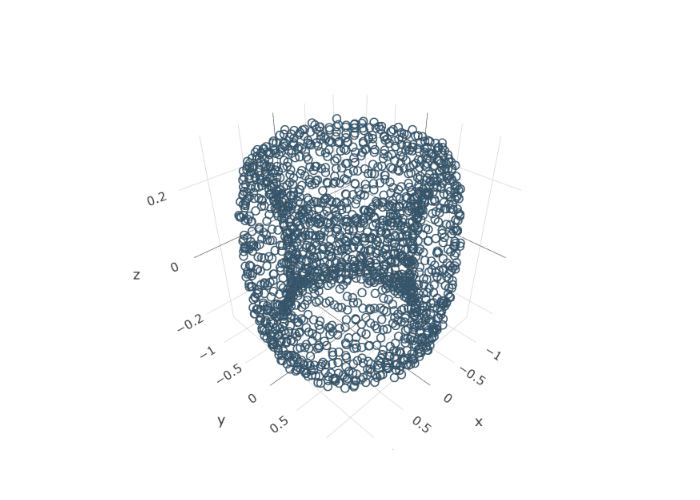

In [414]:
ezplot_pjs(p_homology)

In [5]:
size(p_homology)

(3, 1800)

In [6]:
PH = eirene(p_homology, maxdim=1, maxrad=0.5, model="pc")

Dict{String, Any} with 12 entries:
  "symmat"   => [167165 164907 … 0 0; 164907 167165 … 0 0; … ; 0 0 … 167165 0; …
  "maxnz"    => [0, 43357, 3163915, 1, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1792, 1793, 1794, 1795, 179…
  "cyclerep" => [Vector{Int64}[], [[8, 12], [13, 20], [1, 15], [28, 42], [5, 21…
  "phi"      => [Int64[], [1679, 2859, 4, 6327, 962, 490, 3097, 25187, 131628, …
  "plo"      => [Int64[], [12, 20, 15, 42, 21, 33, 26, 168, 995, 299  …  925, 4…
  "ocg2rad"  => [0.5, 0.499999, 0.499998, 0.499997, 0.499997, 0.499996, 0.49999…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1791, 1792, 1793, 1794, 179…
  "nvl2ovl"  => [790, 851, 829, 953, 879, 832, 937, 860, 910, 913  …  35, 1743,…
  "input"    => Dict{String, Any}("genera"=>[1.27056 1.24981 … 1.28108 1.27095;…
  "tid"      => [Int64[], [12, 20, 15, 42, 21, 33, 26, 168, 995, 299  …  419, 1…
  "grain"    => [[167165, 167165, 167165, 167165, 167165, 167165, 167165, 16716…

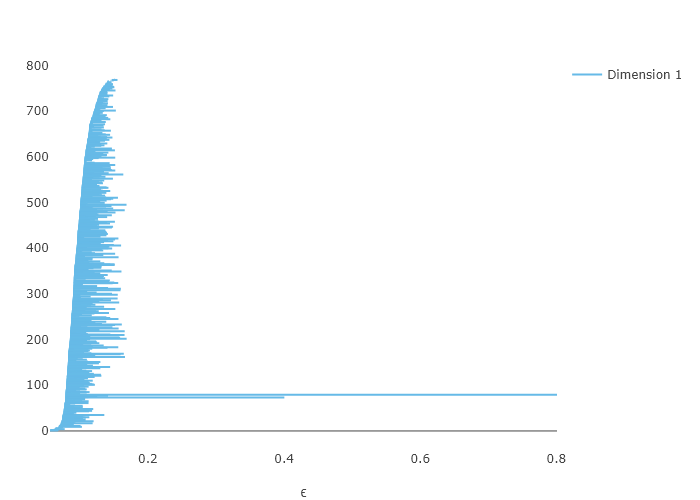

In [7]:
plotbarcode_pjs(PH, dim=1)

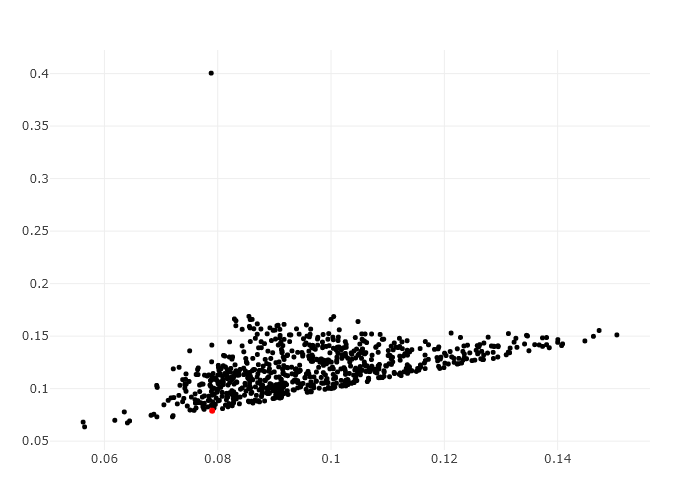

In [12]:
plotpersistencediagram_pjs(PH, dim=1)